In [209]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

from sklearn import preprocessing
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### DATA INFORMATION
##### '''Boston House Price dataset has 14 features and their description is given as follows:
    CRIM per capita crime rate by town
    ZN proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS proportion of non-retail business acres per town
    CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    NOX nitric oxides concentration (parts per 10 million)
    RM average number of rooms per dwelling
    AGE proportion of owner-occupied units built prior to 1940
    DIS weighted distances to five Boston employment centres
    RAD index of accessibility to radial highways
    TAX full-value property-tax rate per dollar 10,000.
    PTRATIO pupil-teacher ratio by town
    B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT % lower status of the population
    Price Median value of owner-occupied homes in $1000's '''

In [210]:
File ='housing.csv'
name = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX','RM','AGE','DIS', 'RAD','TAX','PTRATIO','B-1000','LSTAT','Price(target)']
df= pd.read_csv(File,encoding='latin-1',delim_whitespace=True,names=name)
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B-1000,LSTAT,Price(target)
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Data processing

In [211]:
df.isnull().sum()
df.isnull().any()

CRIM             False
ZN               False
INDUS            False
CHAS             False
NOX              False
RM               False
AGE              False
DIS              False
RAD              False
TAX              False
PTRATIO          False
B-1000           False
LSTAT            False
Price(target)    False
dtype: bool

In [212]:
df.shape

(506, 14)

In [213]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B-1000,LSTAT,Price(target)
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


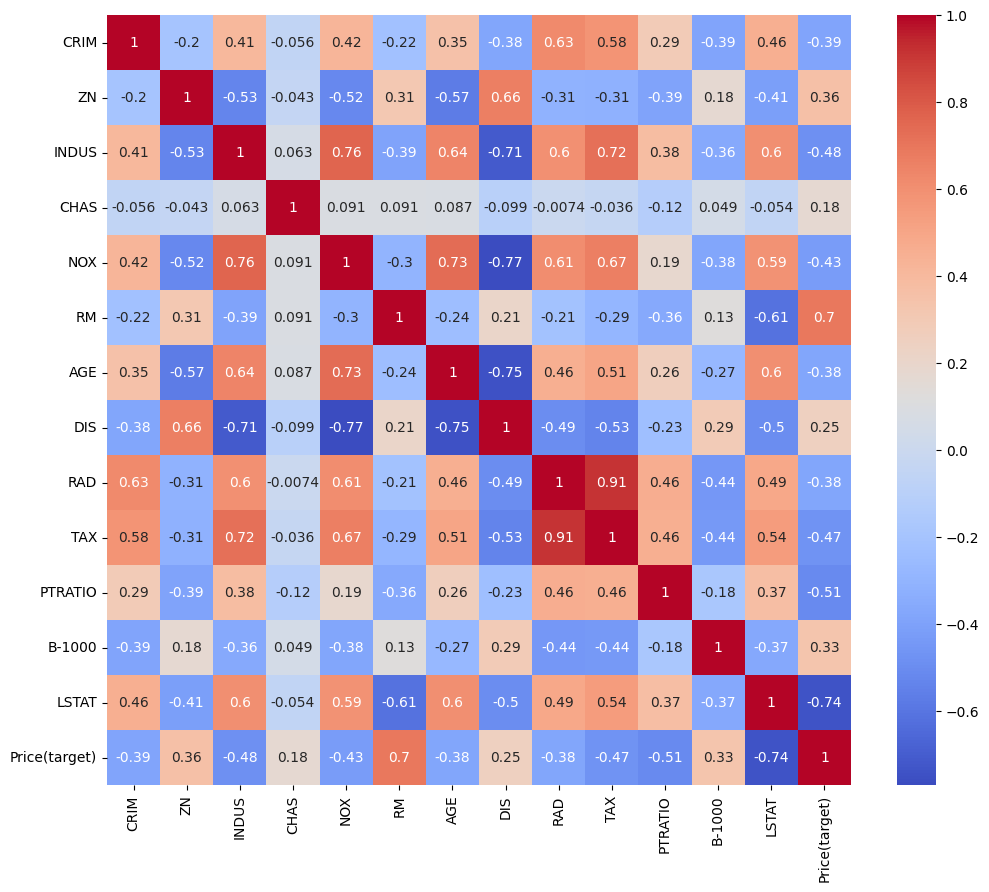

In [214]:
# correlation matrix using heatmap 
corelation_matirx=df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corelation_matirx,annot=True,cmap='coolwarm')
plt.show()

<AxesSubplot:xlabel='LSTAT', ylabel='Price(target)'>

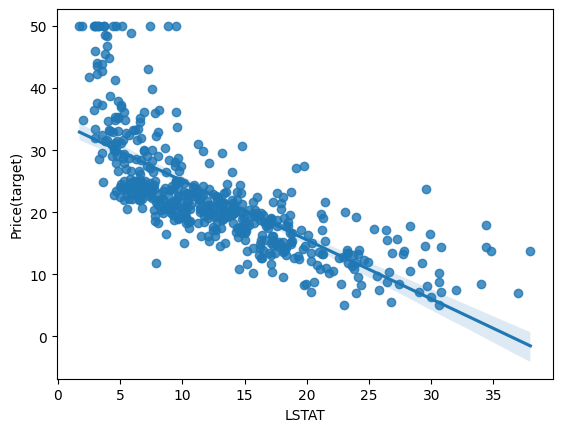

In [215]:
sns.regplot(y=df['Price(target)'],x=df['LSTAT'])

<AxesSubplot:xlabel='RM', ylabel='Price(target)'>

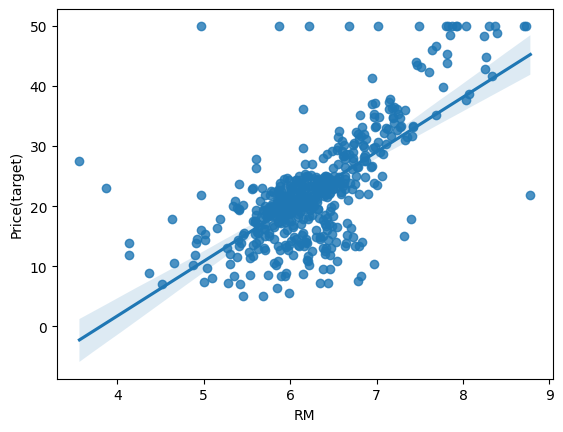

In [216]:
sns.regplot(y=df['Price(target)'],x=df['RM'])

In [217]:
# # get absolute value of the correlation
# cor_target= abs(corelation_matirx['Price(target)'])
# # select highly relavant or correlated featured (threhsold>0.2)
# rel_feature=cor_target[cor_target>0.2]
# # collect the name of the feature
# name_feature= [feature for feature ,value in rel_feature.iteritems()]
# # drop the target coloumn
# name_feature.remove("Price(target)")

In [218]:
# x= df[name_feature].values
# y=df['Price(target)'].values
X = df.drop(['Price(target)'], axis = 1)
y = df['Price(target)']


### Model training

In [219]:
# intialize the linear regression model
reg= LinearRegression()

In [220]:
#split data into 70% of training and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [221]:
reg.fit(X_train,y_train)
# print(reg.coef_)
reg.intercept_

31.631084035693547

In [231]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,reg.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.13347
1,ZN,0.035809
2,INDUS,0.049523
3,CHAS,3.119835
4,NOX,-15.417061
5,RM,4.057199
6,AGE,-0.010821
7,DIS,-1.385998
8,RAD,0.242727
9,TAX,-0.008702


In [230]:
y_pred= reg.predict(X_train)
print(y_pred)
y_pred.shape

[25.28876411 23.70313309 22.15603301 21.26400891 16.81402917 23.35512111
 28.98046792  6.3790461  24.10466228 17.33346812 21.08644212 25.14893932
 27.58058516 20.96885795 40.81657254 18.9823619  15.28542592 18.99306582
 17.90332972 22.65173284 23.23864404 33.71800378 22.81615247 20.346817
 25.36409649 31.03426394 33.46402165 28.26212241  8.74591968  5.23322634
 12.73543499 20.24491631 35.35395225 33.20294722 15.89403228  3.87992958
 33.36864232 21.67444494 19.34441463 26.40386414 18.51617744 17.82000695
 11.17559752 32.21845102 24.74627583 19.70612701 19.50600574 11.82571847
 28.9361623  21.02989688 32.28763268 32.83739612 24.94562841 21.40765383
 25.24985242 43.2415177  30.34873933 33.24548436 26.68061742 27.2145327
 15.37730729 31.26550005 21.05438254 31.42702552 28.95803719 21.77781393
 23.74045509 12.33479724 36.18194537 36.76051353 32.81933496  5.08077595
 20.59688566 22.08303907 35.99943285 17.04874841 23.66013043 19.59260198
 26.80019818 15.30300004 20.87776668 26.92408181 31.03

(354,)

In [224]:
#print the actual value
print(y_test)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: Price(target), Length: 152, dtype: float64


In [225]:
'''model prediction on train data'''
print('MSE:',mean_squared_error(y_train, y_pred))
print('RMSE:',mean_squared_error(y_train, y_pred,squared=False))
print('MAE:',mean_absolute_error(y_train, y_pred))
print('R2-square:',r2_score(y_train, y_pred))


MSE: 22.545481487421423
RMSE: 4.748208239685937
MAE: 3.3568267821682105
R2-square: 0.7434997532004697


C:\Users\KAMALJIT SINGH\AppData\Local\Temp\ipykernel_8784\1535745148.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


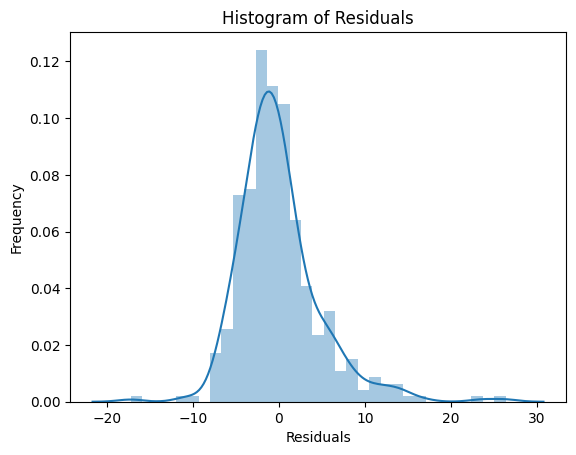

'here the Residuals are normaly distributed. So normally assumption is satisfied'

In [226]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
'''here the Residuals are normaly distributed. So normally assumption is satisfied'''


## For test data

In [227]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [228]:
print('MSE:',mean_squared_error(y_test, y_test_pred))
print('RMSE:',mean_squared_error(y_test, y_test_pred,squared=False))
print('MAE:',mean_absolute_error(y_test, y_test_pred))
print('R2-square:',r2_score(y_test, y_test_pred))
'''here the model evaluation scores are almost matching with that of the train data. so model is not overfiting'''


MSE: 21.51744423117727
RMSE: 4.638689926172827
MAE: 3.1627098714574147
R2-square: 0.7112260057484925


'here the model evaluation scores are almost matching with that of the train data. so model is not overfiting'

### Deployment of Predictive  Model

In [235]:
from string import  Template
import math
width=80
price_width=20
parameter_Width= width- price_width
header_fmt='{{:{}}}{{:>{}}}'
header_fmt=header_fmt.format(parameter_Width,price_width)
fmt='{{:{}}}{{:{}}}'.format(parameter_Width,price_width)

print("Welcome to Boston House Price Prediction".center(100,"*"))
print('\nPlease enter paramter values for house proce')
print('=' * width)
print(header_fmt.format("Parameters",'values'))

print("=" * width)

CRIM=float(input("\nnper capita crime rate by town:"))
Zn= float(input("\nproportion of residential land zoned for lots over 250000 sq.ft:"))
INDUS=float(input("\n porportion of non retail business acres per town:"))
CHAS =float(input("\nCharles River dummy variable (= 1 if tract bounds river; 0 otherwise)"))
NOX=float(input("\nnitric oxides concentration(parts per 10 million)"))
RM=float(input("\navg no. of rooms per dwelling value"))
age= float(input("\nproportion of ownerocupied units built before 1940:"))
dis=float(input("\n distance from nearly: "))
RAD= float(input('\nindex f accessibility to radial highways:'))
TAX=float(input("\nproperty tax rate per rs 10000: "))
PTRATIO=float(input("\n pupil/teacher ration by town: "))
B_1000= float(input("\nproportion of people of africian descent: "))
LSTAT=float(input("\n% of lower staus of the population:"))

parameters = np.array([CRIM, Zn, INDUS, CHAS, NOX, RM, age, dis, RAD, TAX, PTRATIO, B_1000, LSTAT])
parameter_array = parameters.reshape(1, -1)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    predict = reg.predict(parameter_array)
    print(f'${predict[0]}')

******************************Welcome to Boston House Price Prediction******************************

Please enter paramter values for house proce
Parameters                                                                values
$-580.6631131080368


In [237]:
import pickle
pickle.dump(reg,open('Linear_Reg.pkl','wb'))